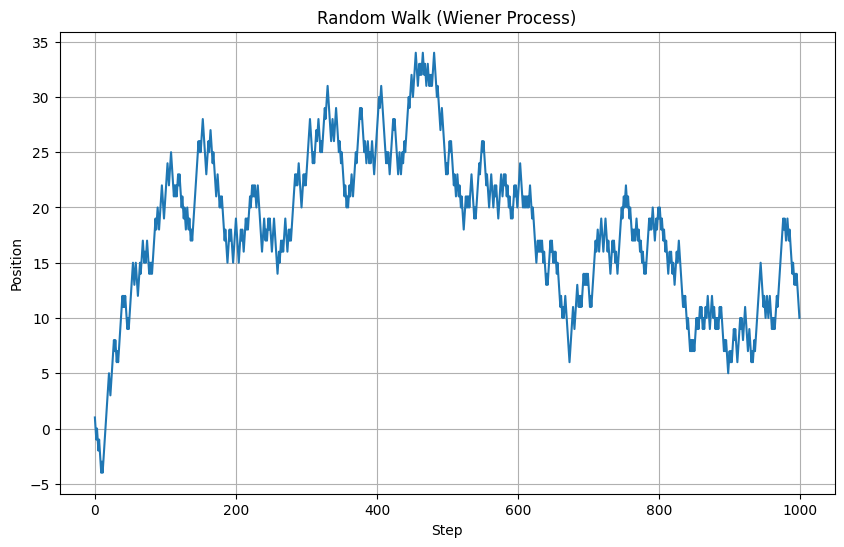

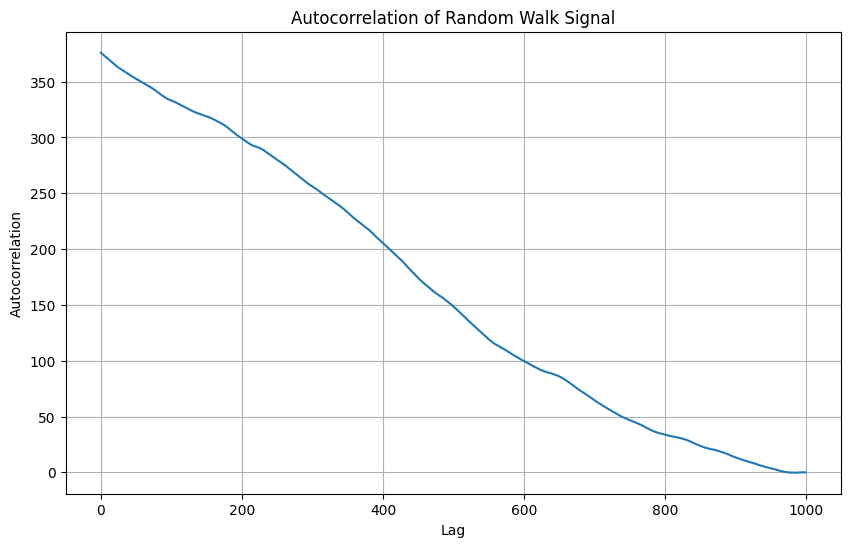

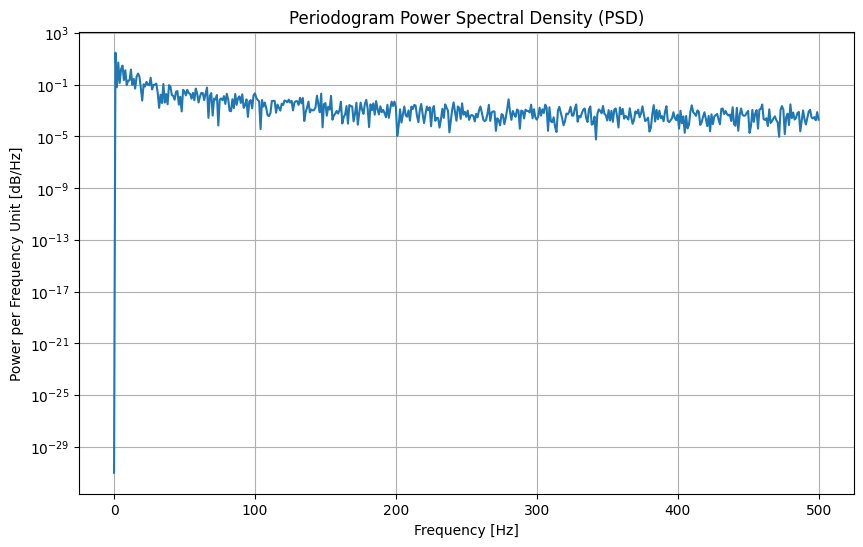

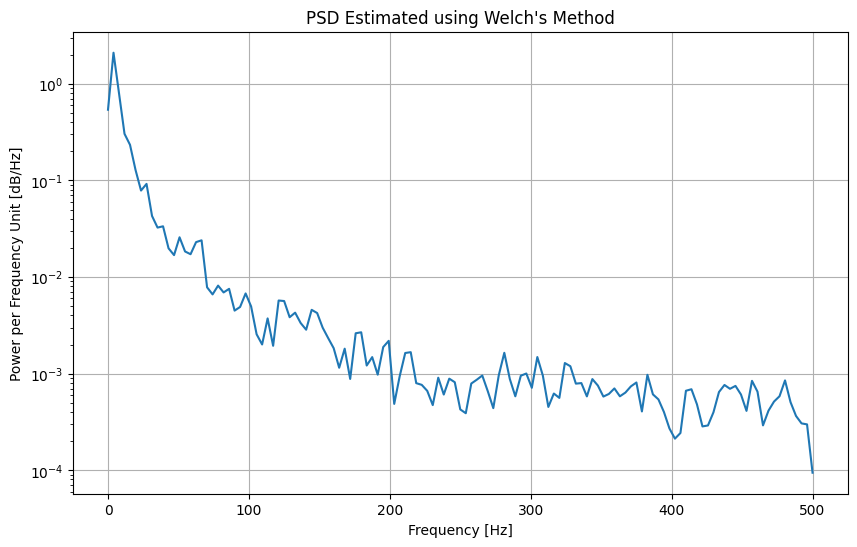

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, periodogram, welch

# Parameters
N = 1000  # Number of samples
fs = 1000  # Sampling frequency (Hz)

# Generate Random Walk (Wiener Process)
steps = np.random.choice([-1, 1], size=N)  # Steps with values -1 and 1
random_walk = np.cumsum(steps)  # Cumulative sum of the steps

# 1. Plot Random Walk signal
plt.figure(figsize=(10, 6))
plt.plot(random_walk)
plt.title("Random Walk (Wiener Process)")
plt.xlabel("Step")
plt.ylabel("Position")
plt.grid(True)
plt.show()

# 2. Compute Autocorrelation
def autocorrelation(x):
    result = correlate(x, x, mode='full')
    result = result[result.size // 2:] / len(x)
    return result

autocorr = autocorrelation(random_walk)

plt.figure(figsize=(10, 6))
plt.plot(autocorr)
plt.title("Autocorrelation of Random Walk Signal")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

# 3. Estimate Power Spectral Density (PSD)
f, Pxx_periodogram = periodogram(random_walk, fs=fs)

plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx_periodogram)
plt.title("Periodogram Power Spectral Density (PSD)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power per Frequency Unit [dB/Hz]")
plt.grid(True)
plt.show()

# 4. Additionally, Welch Method for PSD Estimation
f_welch, Pxx_welch = welch(random_walk, fs=fs, nperseg=256, noverlap=128, window='hann')

plt.figure(figsize=(10, 6))
plt.semilogy(f_welch, Pxx_welch)
plt.title("PSD Estimated using Welch's Method")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Power per Frequency Unit [dB/Hz]")
plt.grid(True)
plt.show()
